In [1]:
import pandas as pd
import sqlite3

In [2]:
con = sqlite3.connect("/Users/lenovo/Desktop/IE 561 Data Driven Design/Wildfire Project/188-million-us-wildfires/FPA_FOD_20170508.sqlite")
df = pd.read_sql_query("SELECT * from Fires", con)

In [151]:
dataframe = df[['OBJECTID','FIRE_YEAR','FIRE_CODE','DISCOVERY_DATE','DISCOVERY_DOY','DISCOVERY_TIME','STAT_CAUSE_CODE','STAT_CAUSE_DESCR','CONT_DATE','CONT_DOY','CONT_TIME','FIRE_SIZE','FIRE_SIZE_CLASS','LATITUDE','LONGITUDE','OWNER_DESCR','STATE','COUNTY']]

In [152]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880465 entries, 0 to 1880464
Data columns (total 18 columns):
OBJECTID            int64
FIRE_YEAR           int64
FIRE_CODE           object
DISCOVERY_DATE      float64
DISCOVERY_DOY       int64
DISCOVERY_TIME      object
STAT_CAUSE_CODE     float64
STAT_CAUSE_DESCR    object
CONT_DATE           float64
CONT_DOY            float64
CONT_TIME           object
FIRE_SIZE           float64
FIRE_SIZE_CLASS     object
LATITUDE            float64
LONGITUDE           float64
OWNER_DESCR         object
STATE               object
COUNTY              object
dtypes: float64(7), int64(3), object(8)
memory usage: 258.2+ MB


In [153]:
dataframe.head() #FIRE_SIZE, FIRE_SIZE_CLASS, LATITUDE, LONGITUDE, OWNER_DESCRIPTION

OBJECTID  FIRE_YEAR FIRE_CODE  DISCOVERY_DATE  DISCOVERY_DOY  \
0         1       2005      BJ8K       2453403.5             33   
1         2       2004      AAC0       2453137.5            133   
2         3       2004      A32W       2453156.5            152   
3         4       2004      None       2453184.5            180   
4         5       2004      None       2453184.5            180   

  DISCOVERY_TIME  STAT_CAUSE_CODE STAT_CAUSE_DESCR  CONT_DATE  CONT_DOY  \
0           1300              9.0    Miscellaneous  2453403.5      33.0   
1           0845              1.0        Lightning  2453137.5     133.0   
2           1921              5.0   Debris Burning  2453156.5     152.0   
3           1600              1.0        Lightning  2453189.5     185.0   
4           1600              1.0        Lightning  2453189.5     185.0   

  CONT_TIME  FIRE_SIZE FIRE_SIZE_CLASS   LATITUDE   LONGITUDE  \
0      1730       0.10               A  40.036944 -121.005833   
1      1530       0.25               A  38.933056 -120.404444   
2      2024       0.10               A  38.984167 -120.735556   
3      1400       0.10               A  38.559167 -119.913333   
4      1200       0.10               A  38.559167 -119.933056   

        OWNER_DESCR STATE COUNTY  
0              USFS    CA     63  
1              USFS    CA     61  
2  STATE OR PRIVATE    CA     17  
3              USFS    CA      3  
4              USFS    CA      3

In [52]:
# Missing value columns
x = dataframe.isna().sum()
for i in range(len(x)): 
    if (x[i] > 0):
        print("{}\n{}\n".format(x.index[i],x[i]))

FIRE_CODE
1555636

DISCOVERY_TIME
882638

CONT_DATE
891531

CONT_DOY
891531

CONT_TIME
972173



In [55]:
print(dataframe.shape)
import matplotlib.pyplot as plt

(1880465, 16)


FIRE_SIZE_CLASS
B    939376
A    666919
C    220077
D     28427
E     14107
F      7786
G      3773
Name: OBJECTID, dtype: int64


<BarContainer object of 7 artists>

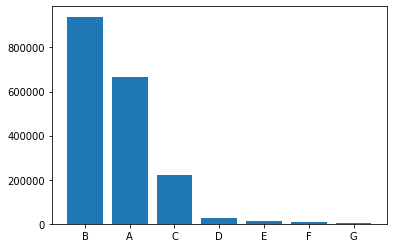

In [54]:
#Number of fires by class
Fires_by_size_class = (dataframe.groupby("FIRE_SIZE_CLASS")["OBJECTID"].count()).sort_values(ascending = False)
print(Fires_by_size_class)
plt.bar(x=Fires_by_size_class.index[:10], height = Fires_by_size_class.values[:10])

In [181]:
#One feature that can be noted is that fires of class A,B and C have occured many times among the available data

OWNER_DESCR
MISSING/NOT SPECIFIED    1050835
PRIVATE                   314822
USFS                      188338
BIA                       106819
STATE OR PRIVATE           71881
BLM                        63278
STATE                      30790
NPS                        17524
FWS                        12191
TRIBAL                      8952
OTHER FEDERAL               6452
MUNICIPAL/LOCAL             4236
UNDEFINED FEDERAL           2206
COUNTY                      1841
BOR                          285
FOREIGN                       15
Name: OBJECTID, dtype: int64


<BarContainer object of 16 artists>

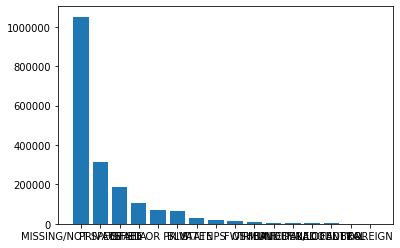

In [182]:
#No of fires manageb by owners/organizations
Fires_by_ownerdescription = (dataframe.groupby("OWNER_DESCR")["OBJECTID"].count()).sort_values(ascending = False)
print(Fires_by_ownerdescription)
plt.bar(x=Fires_by_ownerdescription.index[: 16], height = Fires_by_ownerdescription.values[:16])

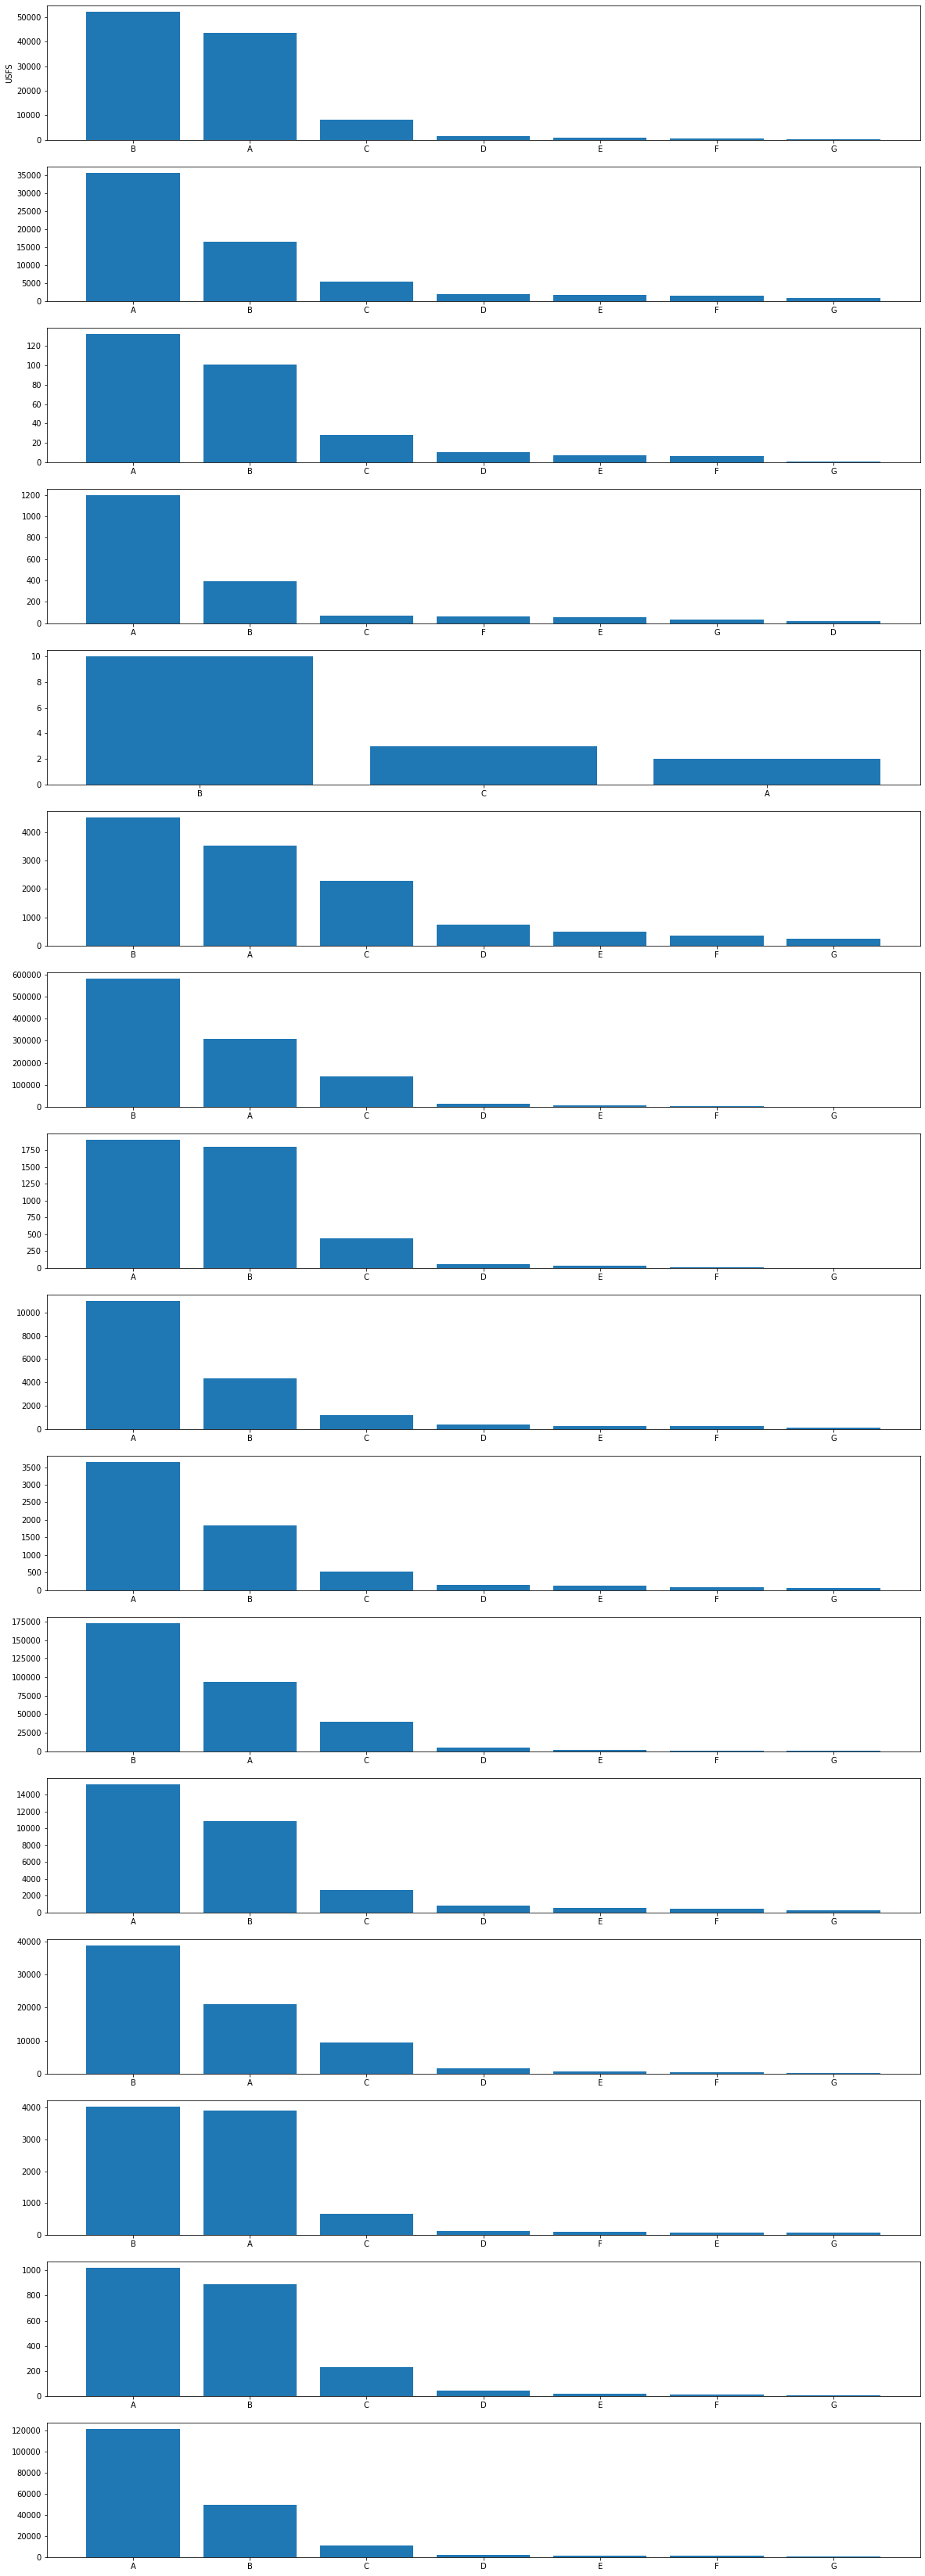

In [161]:
#Bar plots for different fire size classes managed by different owners/organizations
y = (dataframe.groupby(['OWNER_DESCR','FIRE_SIZE_CLASS']))['OBJECTID'].count()

owners = y.index.levels[0]

fig, ax = plt.subplots(16,1,figsize = (20,60))

for i in range(len(owners)):
    j = i//16
    k = i - (j*16)
    ax[k].bar(x = y[y.index.levels[0][i]].sort_values(ascending = False).index[:7], 
            height = y[y.index.levels[0][i]].sort_values(ascending = False).values[:7])
    ax[j].set(ylabel = owners[i])

In [183]:
#For the Foreign owners/organizations, Fire management is executed only for fire size classes A,B and C

FIRE_YEAR
2011    58574
2015    54068
2012    51279
2014    48330
2013    46118
1996    44223
1994    43360
1992    39009
1995    38758
2006    37921
2000    37612
2001    37012
1993    36328
2007    35614
2002    35366
2005    33372
2009    33321
2003    31845
2010    29849
1999    29487
2008    28891
2004    27792
1997    25878
1998    24285
Name: CONT_TIME, dtype: int64


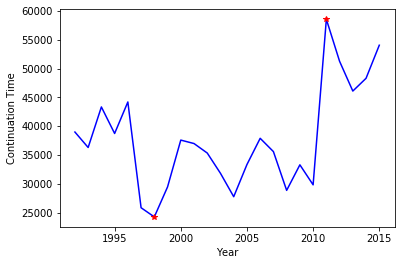

In [118]:
#Variation of fire duration with time
y = (dataframe.groupby(['FIRE_YEAR']))['CONT_TIME'].count()
plt.plot(y.index , y.values,c ='blue')
plt.plot(y.index[y == min(y)], min(y), 'r*')
plt.plot(y.index[y == max(y)], max(y), 'r*')
plt.xlabel("Year")
plt.ylabel("Continuation Time")
print(y.sort_values(ascending = False))

In [ ]:
#As we can see above, in the year 2011 there was wildfire outbreak that lasted longer and containment time was spiked up. We can therefore investigate further to identify possible causes, owner, fire class, size and other features for the same time period.

FIRE_YEAR
2006    114004
2000     96416
2007     95573
2011     90552
1999     89363
2005     88604
2001     86587
2008     85378
2010     79889
2009     78325
1994     75955
2002     75656
1996     75574
2015     74491
2012     72769
1995     71472
2004     69279
1998     68370
2003     68261
1992     67975
2014     67753
2013     64780
1993     61989
1997     61450
Name: FIRE_SIZE, dtype: int64


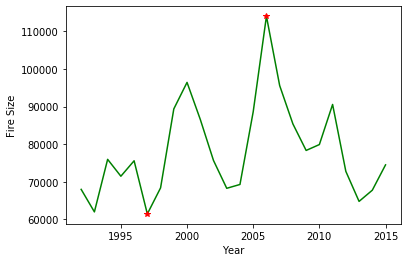

In [119]:
#Variation of Fire Size over the years
y = (dataframe.groupby(['FIRE_YEAR']))['FIRE_SIZE'].count()
plt.plot(y.index , y.values,c ='green')
plt.plot(y.index[y == min(y)], min(y), 'r*')
plt.plot(y.index[y == max(y)], max(y), 'r*')
plt.xlabel("Year")
plt.ylabel("Fire Size")
print(y.sort_values(ascending = False))

In [ ]:
#A fire of large magnitude can be seen to have occured in the year 2006 from the above plot.

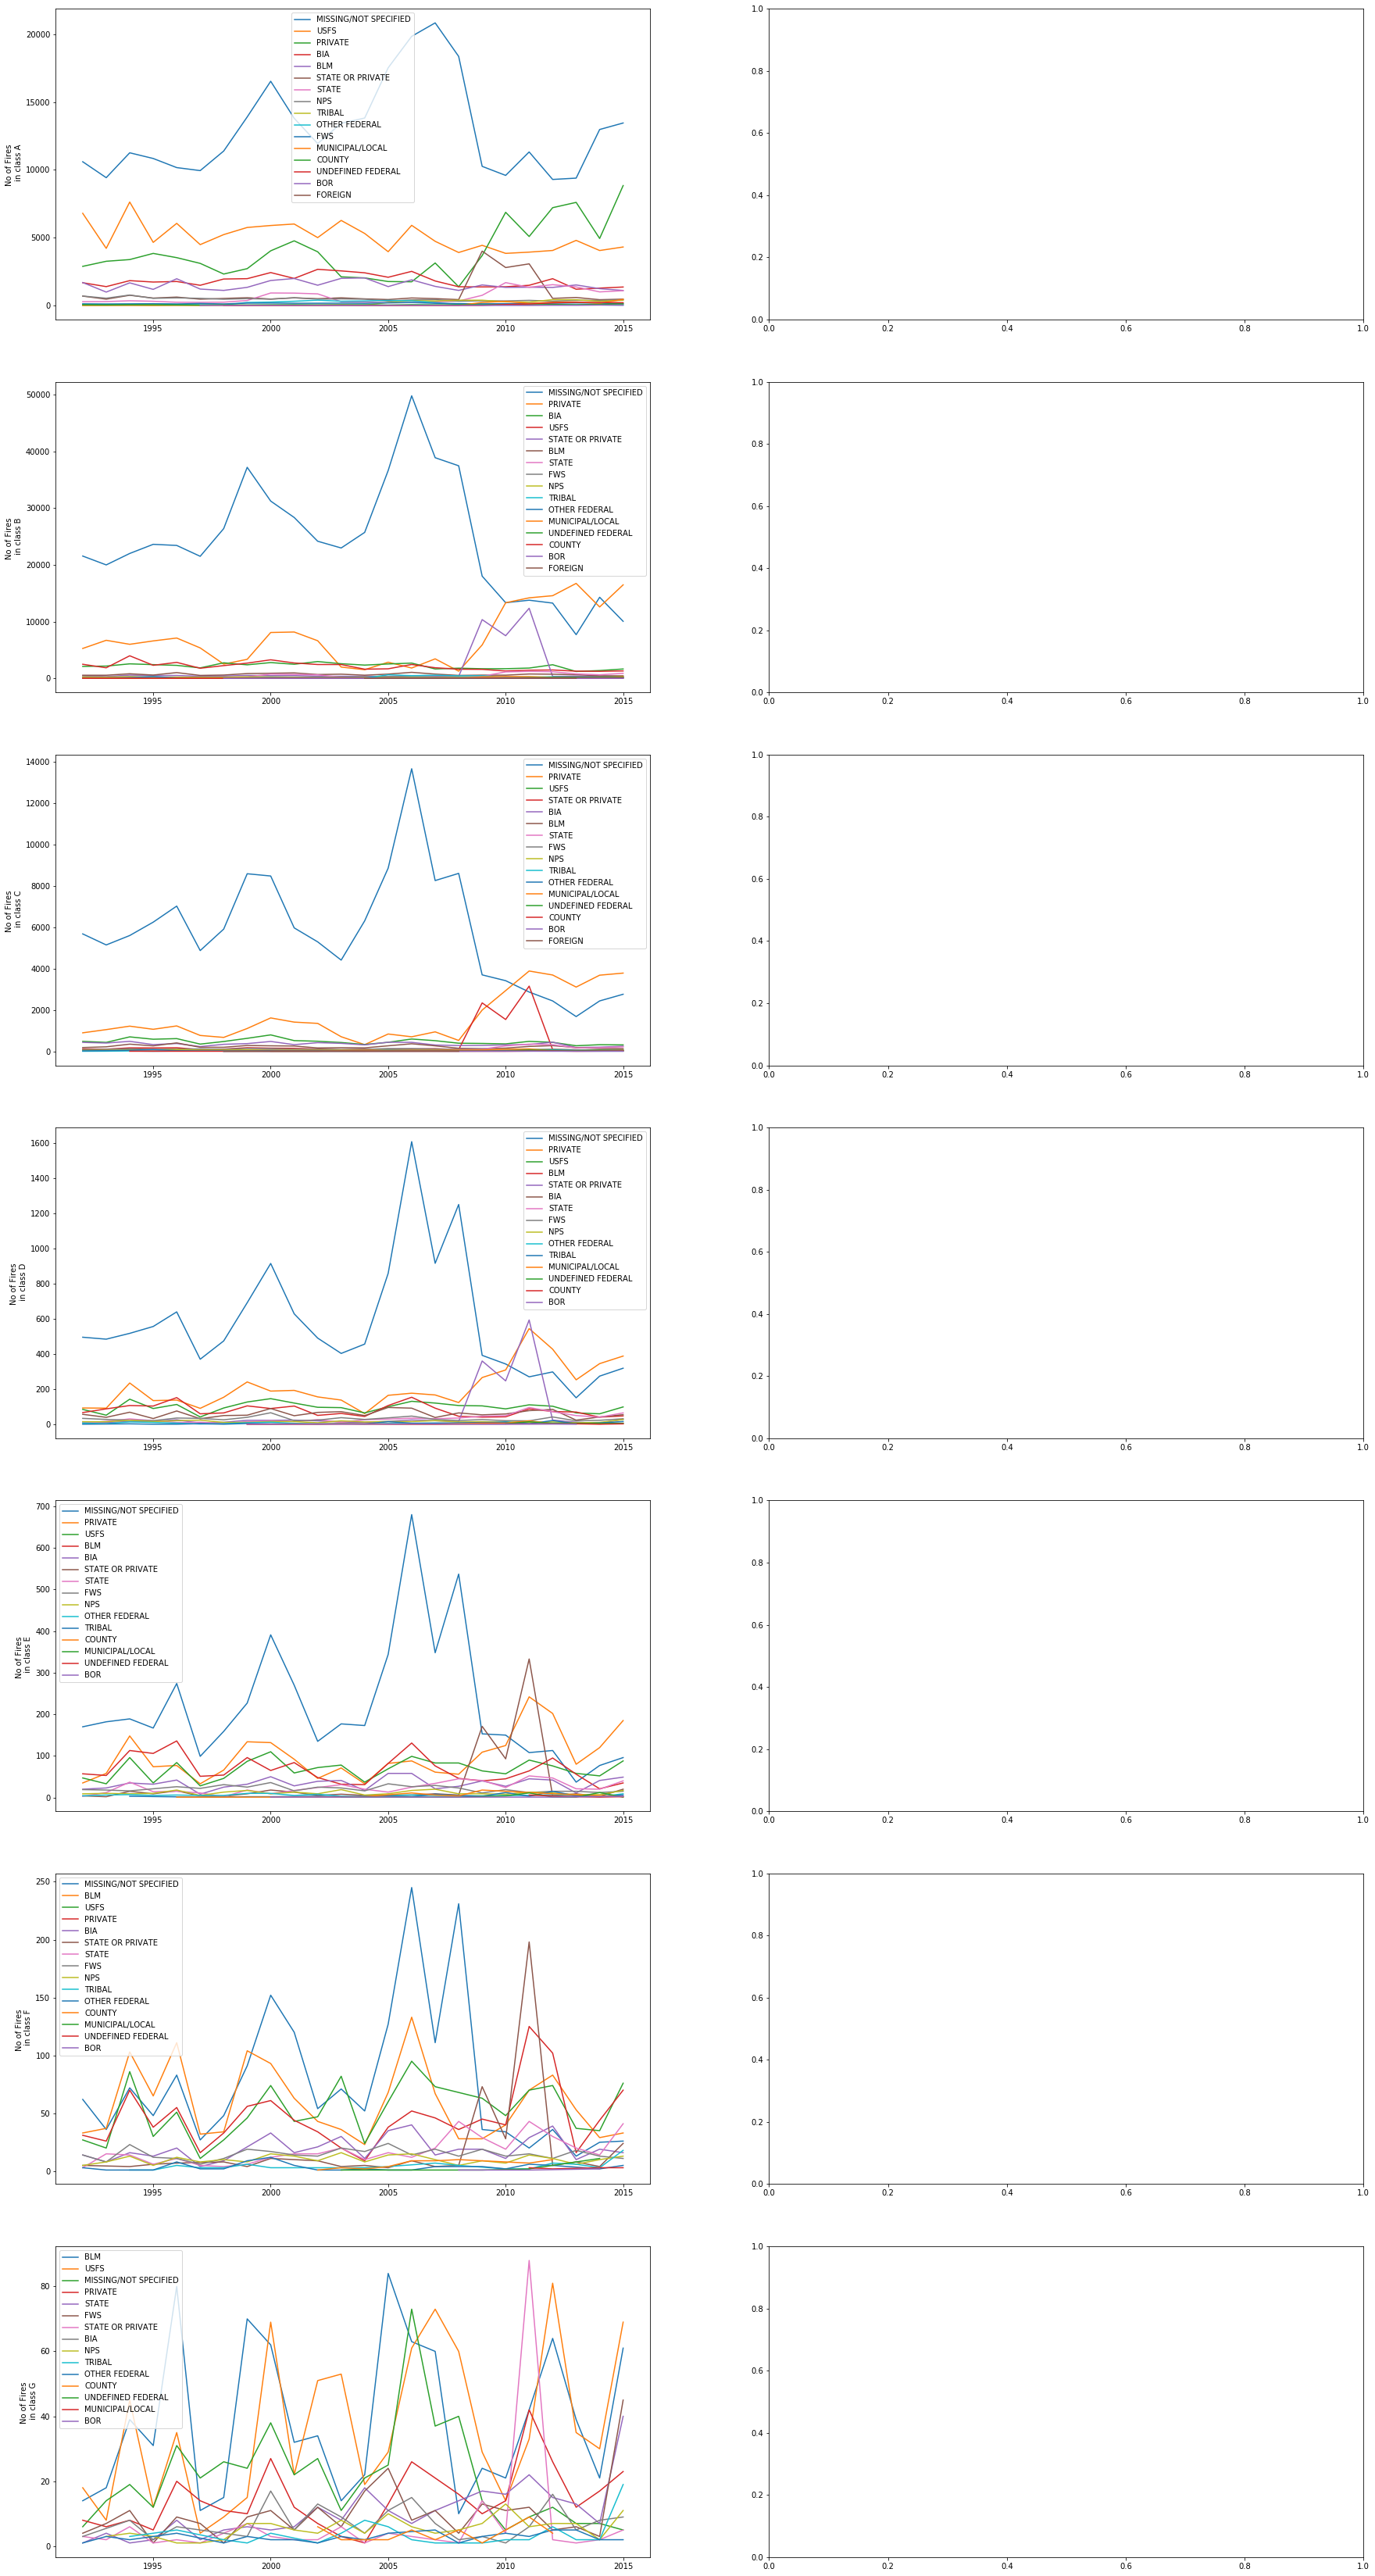

In [162]:
#Trends in Number of fires occured over the years for different sizes managed by different owners/organizations
z = (dataframe.groupby(['FIRE_SIZE_CLASS','OWNER_DESCR']))['OBJECTID'].count()

owner_list = z.index.levels[0]
x = []
for i in range(len(owner_list)):
    x.append(z[z.index.levels[0][i]].sort_values(ascending = False).index[:16])


y = (dataframe.groupby(['FIRE_SIZE_CLASS','OWNER_DESCR','FIRE_YEAR']))['OBJECTID'].count()

owner_list = y.index.levels[0]

fig, ax = plt.subplots(7,2,figsize = (30,60))

for i in range(len(owner_list)):
    j = i//7
    k = i - (j*7)
    
    owner_description_list = []
    
    for l in x[i]:
        
        ax[k,j].plot(y[y.index.levels[0][i]][l].index, 
                     y[y.index.levels[0][i]][l].values,
                    label = l)
        ax[k,j].set(ylabel = 'No of Fires \n in class {}'.format(owner_list[i]))
    ax[k,j].legend()

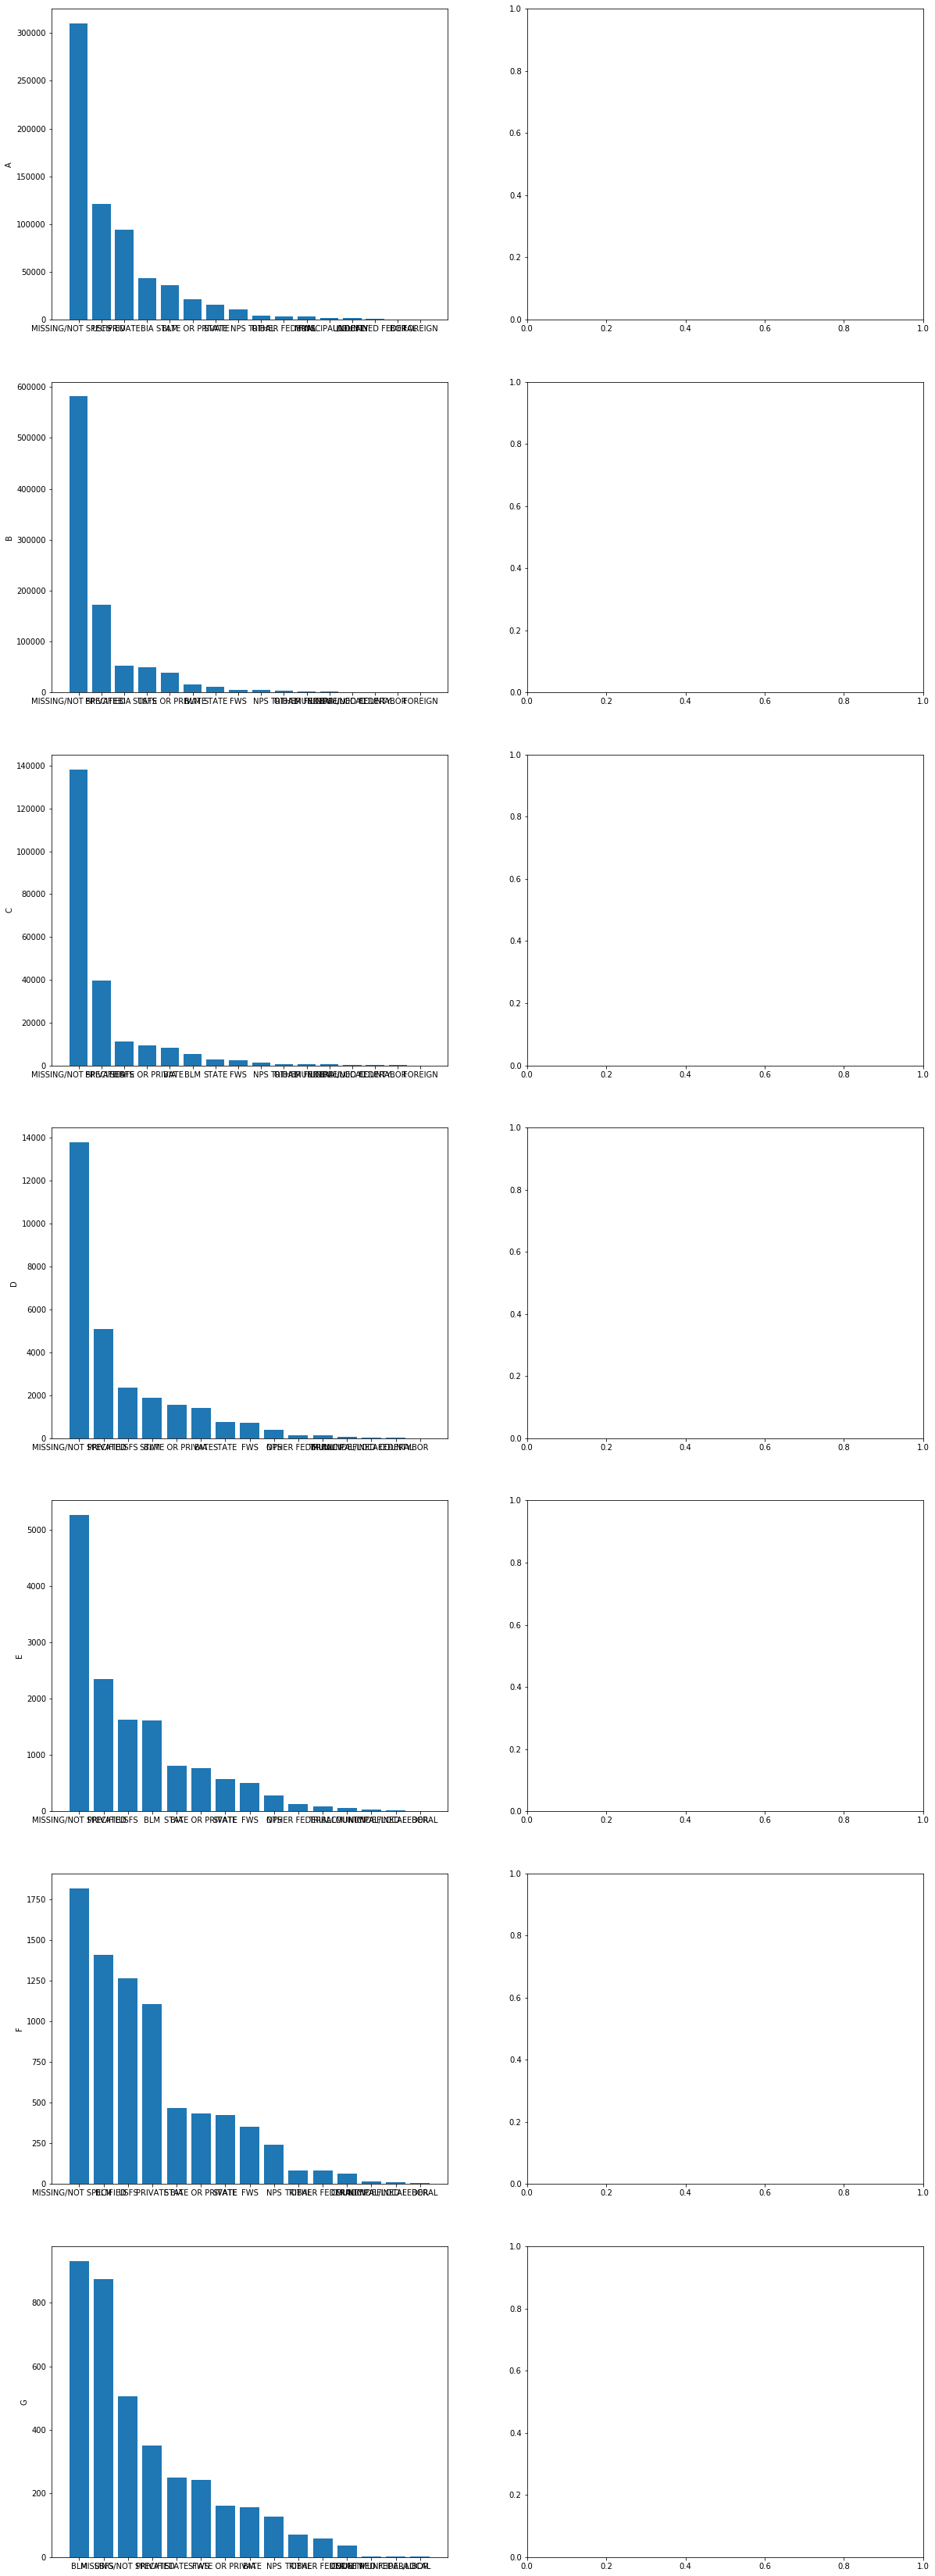

In [163]:
#No of fires in respective fire size classes for all owners
y = (dataframe.groupby(['FIRE_SIZE_CLASS','OWNER_DESCR']))['OBJECTID'].count()

fire_size_class_list = y.index.levels[0]

fig, ax = plt.subplots(7,2,figsize = (20,60))

for i in range(len(fire_size_class_list)):
    j = i//7
    k = i - (j*7)
    ax[k,j].bar(x = y[y.index.levels[0][i]].sort_values(ascending = False).index[:16], 
            height = y[y.index.levels[0][i]].sort_values(ascending = False).values[:16])
    ax[k,j].set(ylabel = fire_size_class_list[i])

In [ ]:
#We can observe from the previous bar plots that for fire size classes A,B and C the organization is unspecified. This can be further supported by stating that the disaster management for A,B and C types is a collaborative effort of many organizations hence it is unspecified.

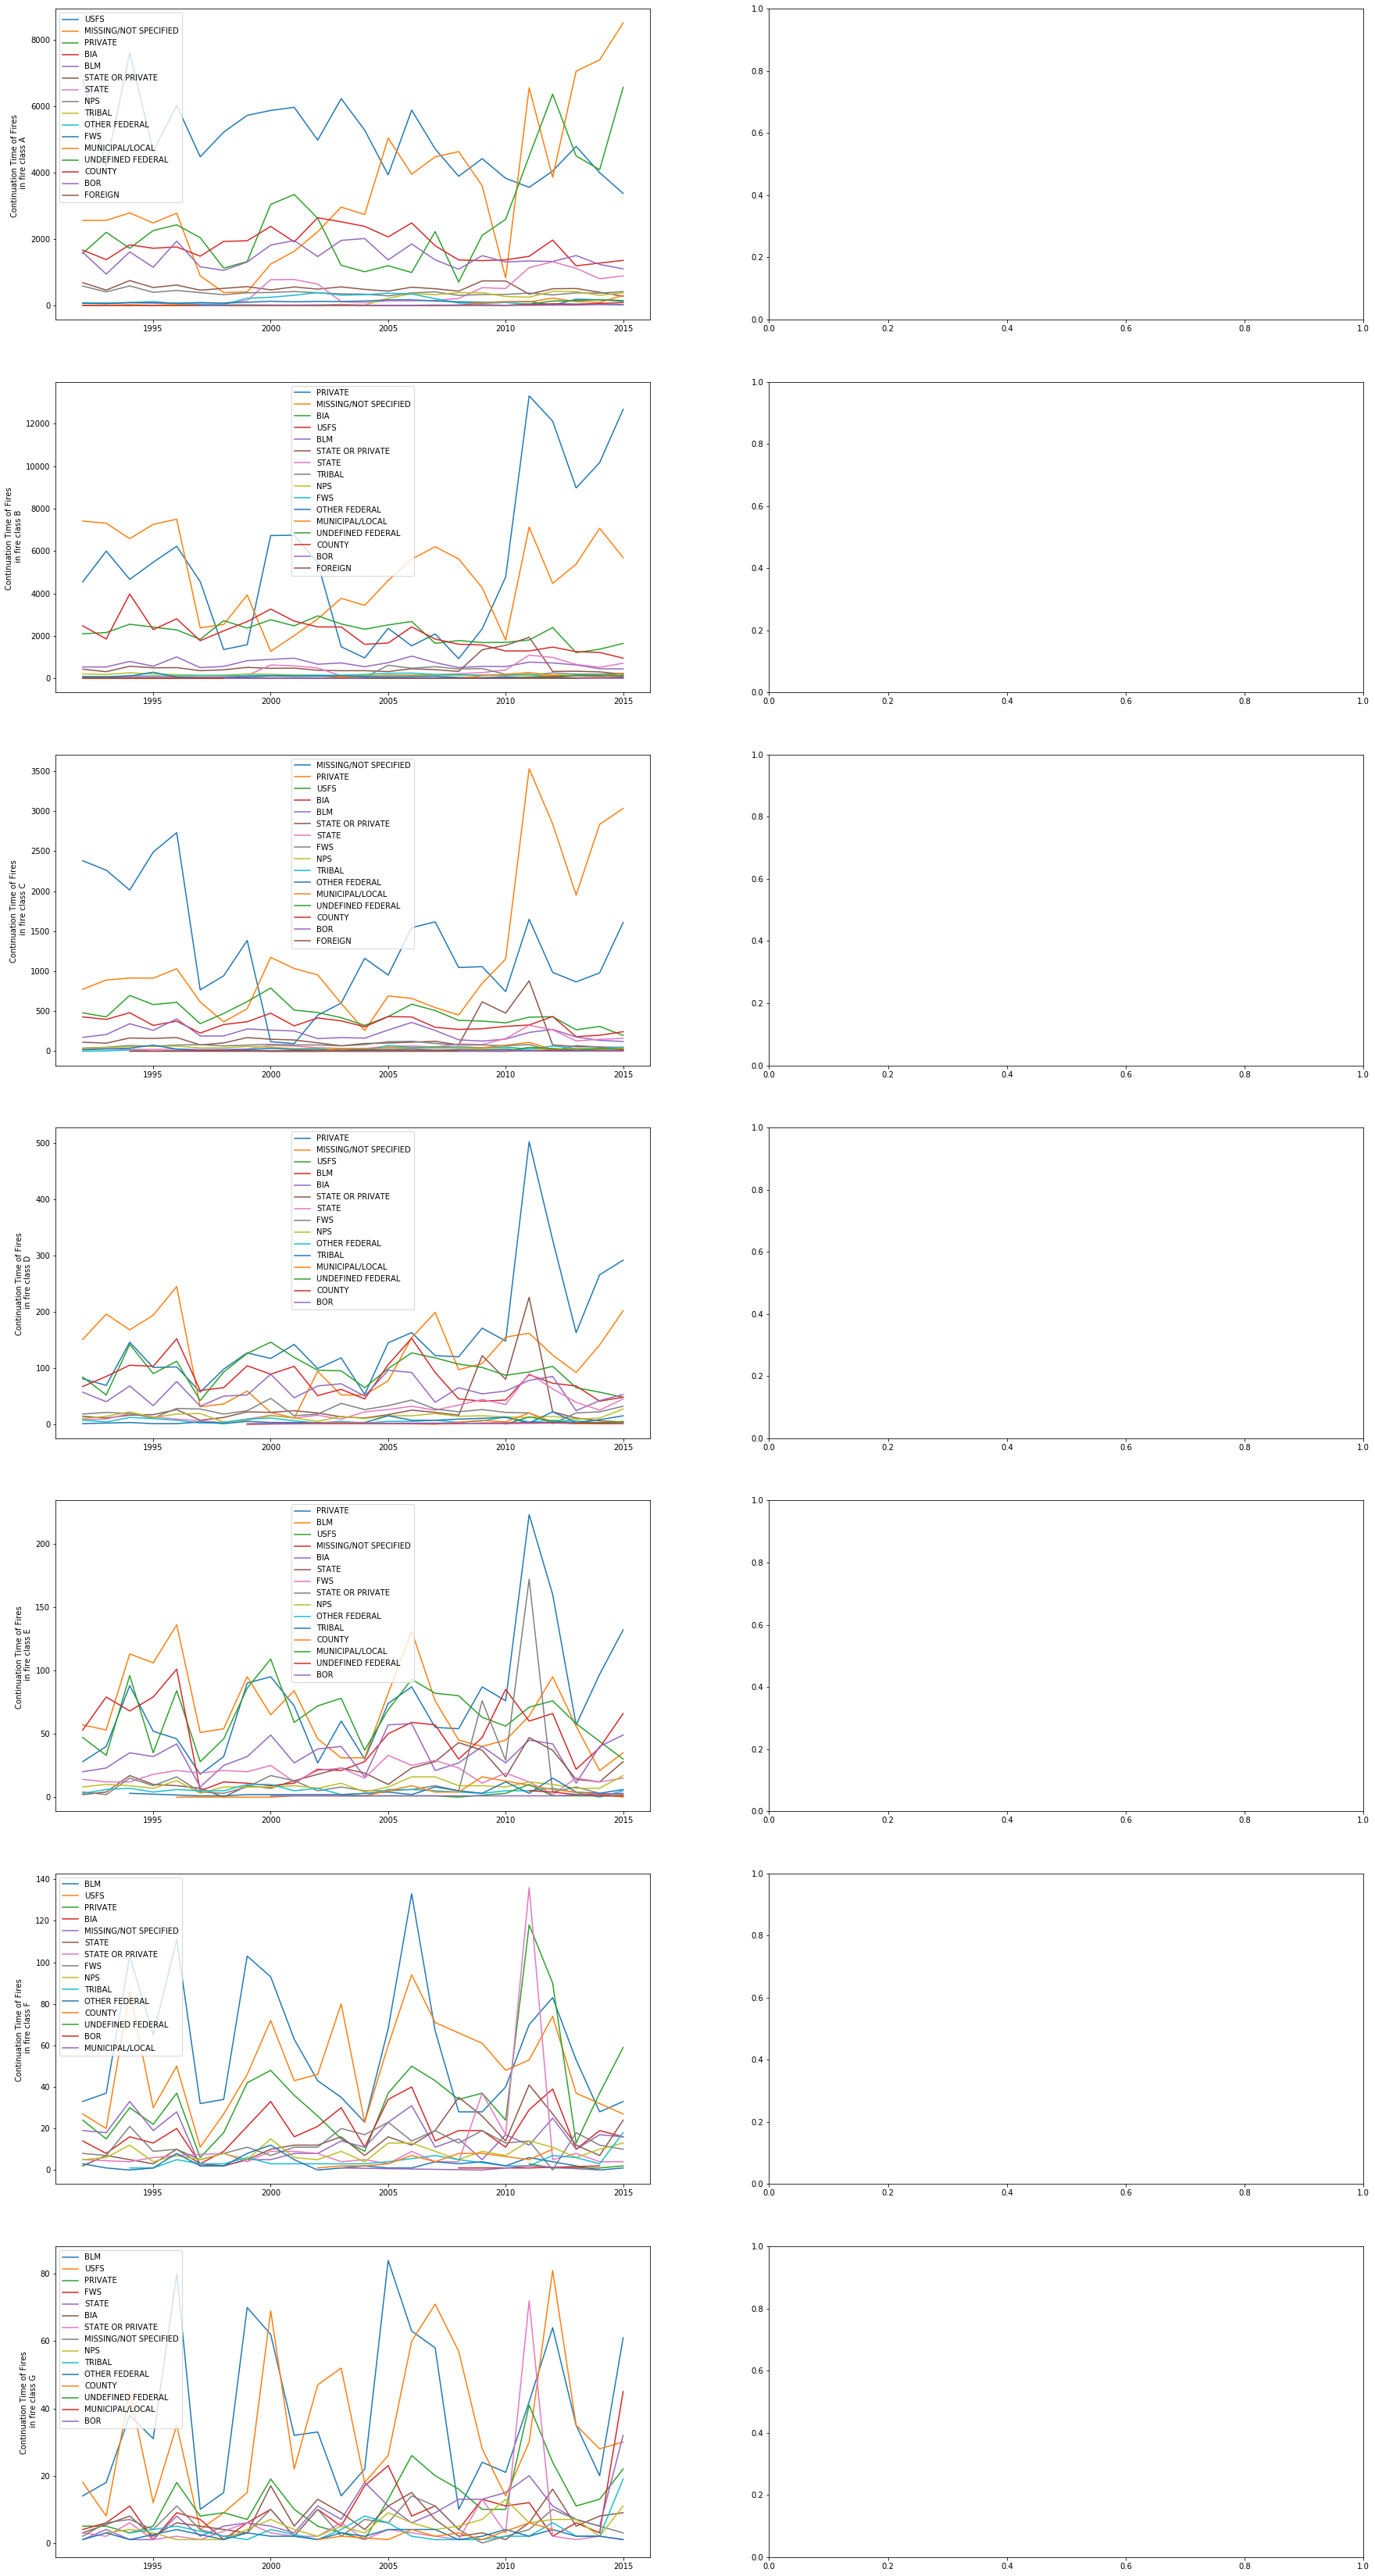

In [164]:
#Duration of fires over the years of 7 fire classes managed by the 5 organizations/owners
z = (dataframe.groupby(['FIRE_SIZE_CLASS','OWNER_DESCR']))['CONT_TIME'].count()

owner_list = z.index.levels[0]
x = []
for i in range(len(owner_list)):
    x.append(z[z.index.levels[0][i]].sort_values(ascending = False).index[:16])


y = (dataframe.groupby(['FIRE_SIZE_CLASS','OWNER_DESCR','FIRE_YEAR']))['CONT_TIME'].count()

owner_list = y.index.levels[0]

fig, ax = plt.subplots(7,2,figsize = (30,60))

for i in range(len(owner_list)):
    j = i//7
    k = i - (j*7)
    
    owner_description_list = []
    
    for l in x[i]:
        
        ax[k,j].plot(y[y.index.levels[0][i]][l].index, 
                     y[y.index.levels[0][i]][l].values,
                    label = l)
        ax[k,j].set(ylabel = 'Continuation Time of Fires \n in fire class {}'.format(owner_list[i]))
    ax[k,j].legend()

In [ ]:
#From the above plots, we can identify a spike in continuation time for fire classes A,C,G owned by the USFS which is the forest service department,  indicating a high magnitude forest fire in 2011!

IndexError: index 2 is out of bounds for axis 1 with size 2

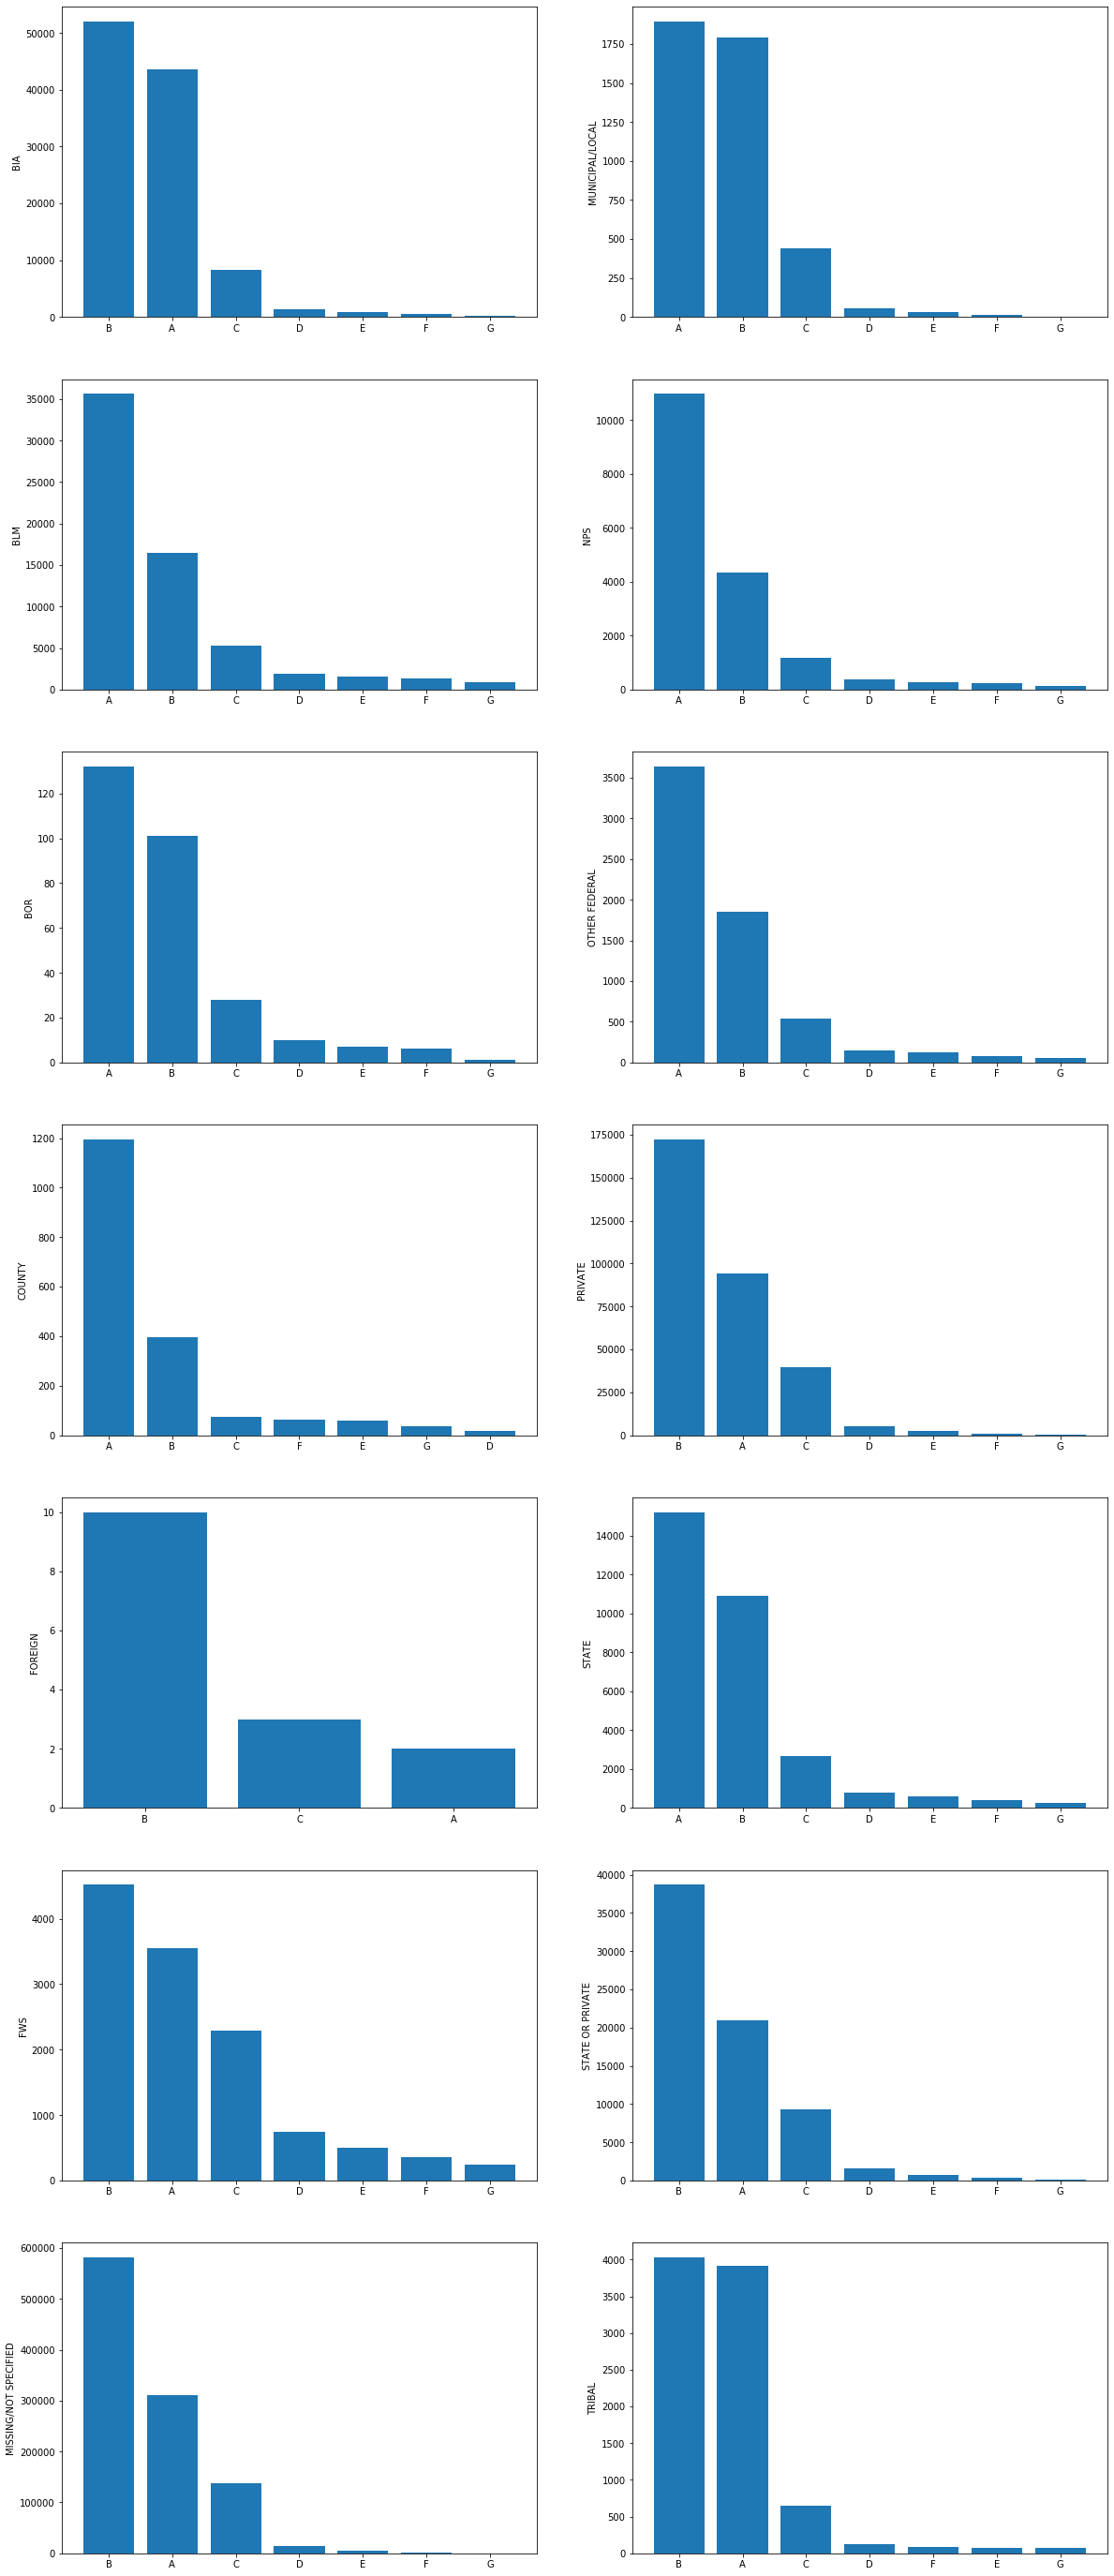

In [165]:
#Number of fires in respective fire size classes by owners
y = (dataframe.groupby(['OWNER_DESCR','FIRE_SIZE_CLASS']))['OBJECTID'].count()

fire_owner_list = y.index.levels[0]

fig, ax = plt.subplots(7,2,figsize = (20,50))

for i in range(len(fire_owner_list)):
    j = i//7
    k = i - (j*7)
    ax[k,j].bar(x = y[y.index.levels[0][i]].sort_values(ascending = False).index[:16], 
            height = y[y.index.levels[0][i]].sort_values(ascending = False).values[:16])
    ax[k,j].set(ylabel = fire_owner_list[i])

In [ ]:
#The fire classes A, B and C have been managed by all the types of owners. We can clearly identify that Foreign assistance/ ownership is involved only for fire classes A,B and C which motivates to explore more for these fire classes for the underlying reasons and disaster management measures/features

IndexError: index 2 is out of bounds for axis 1 with size 2

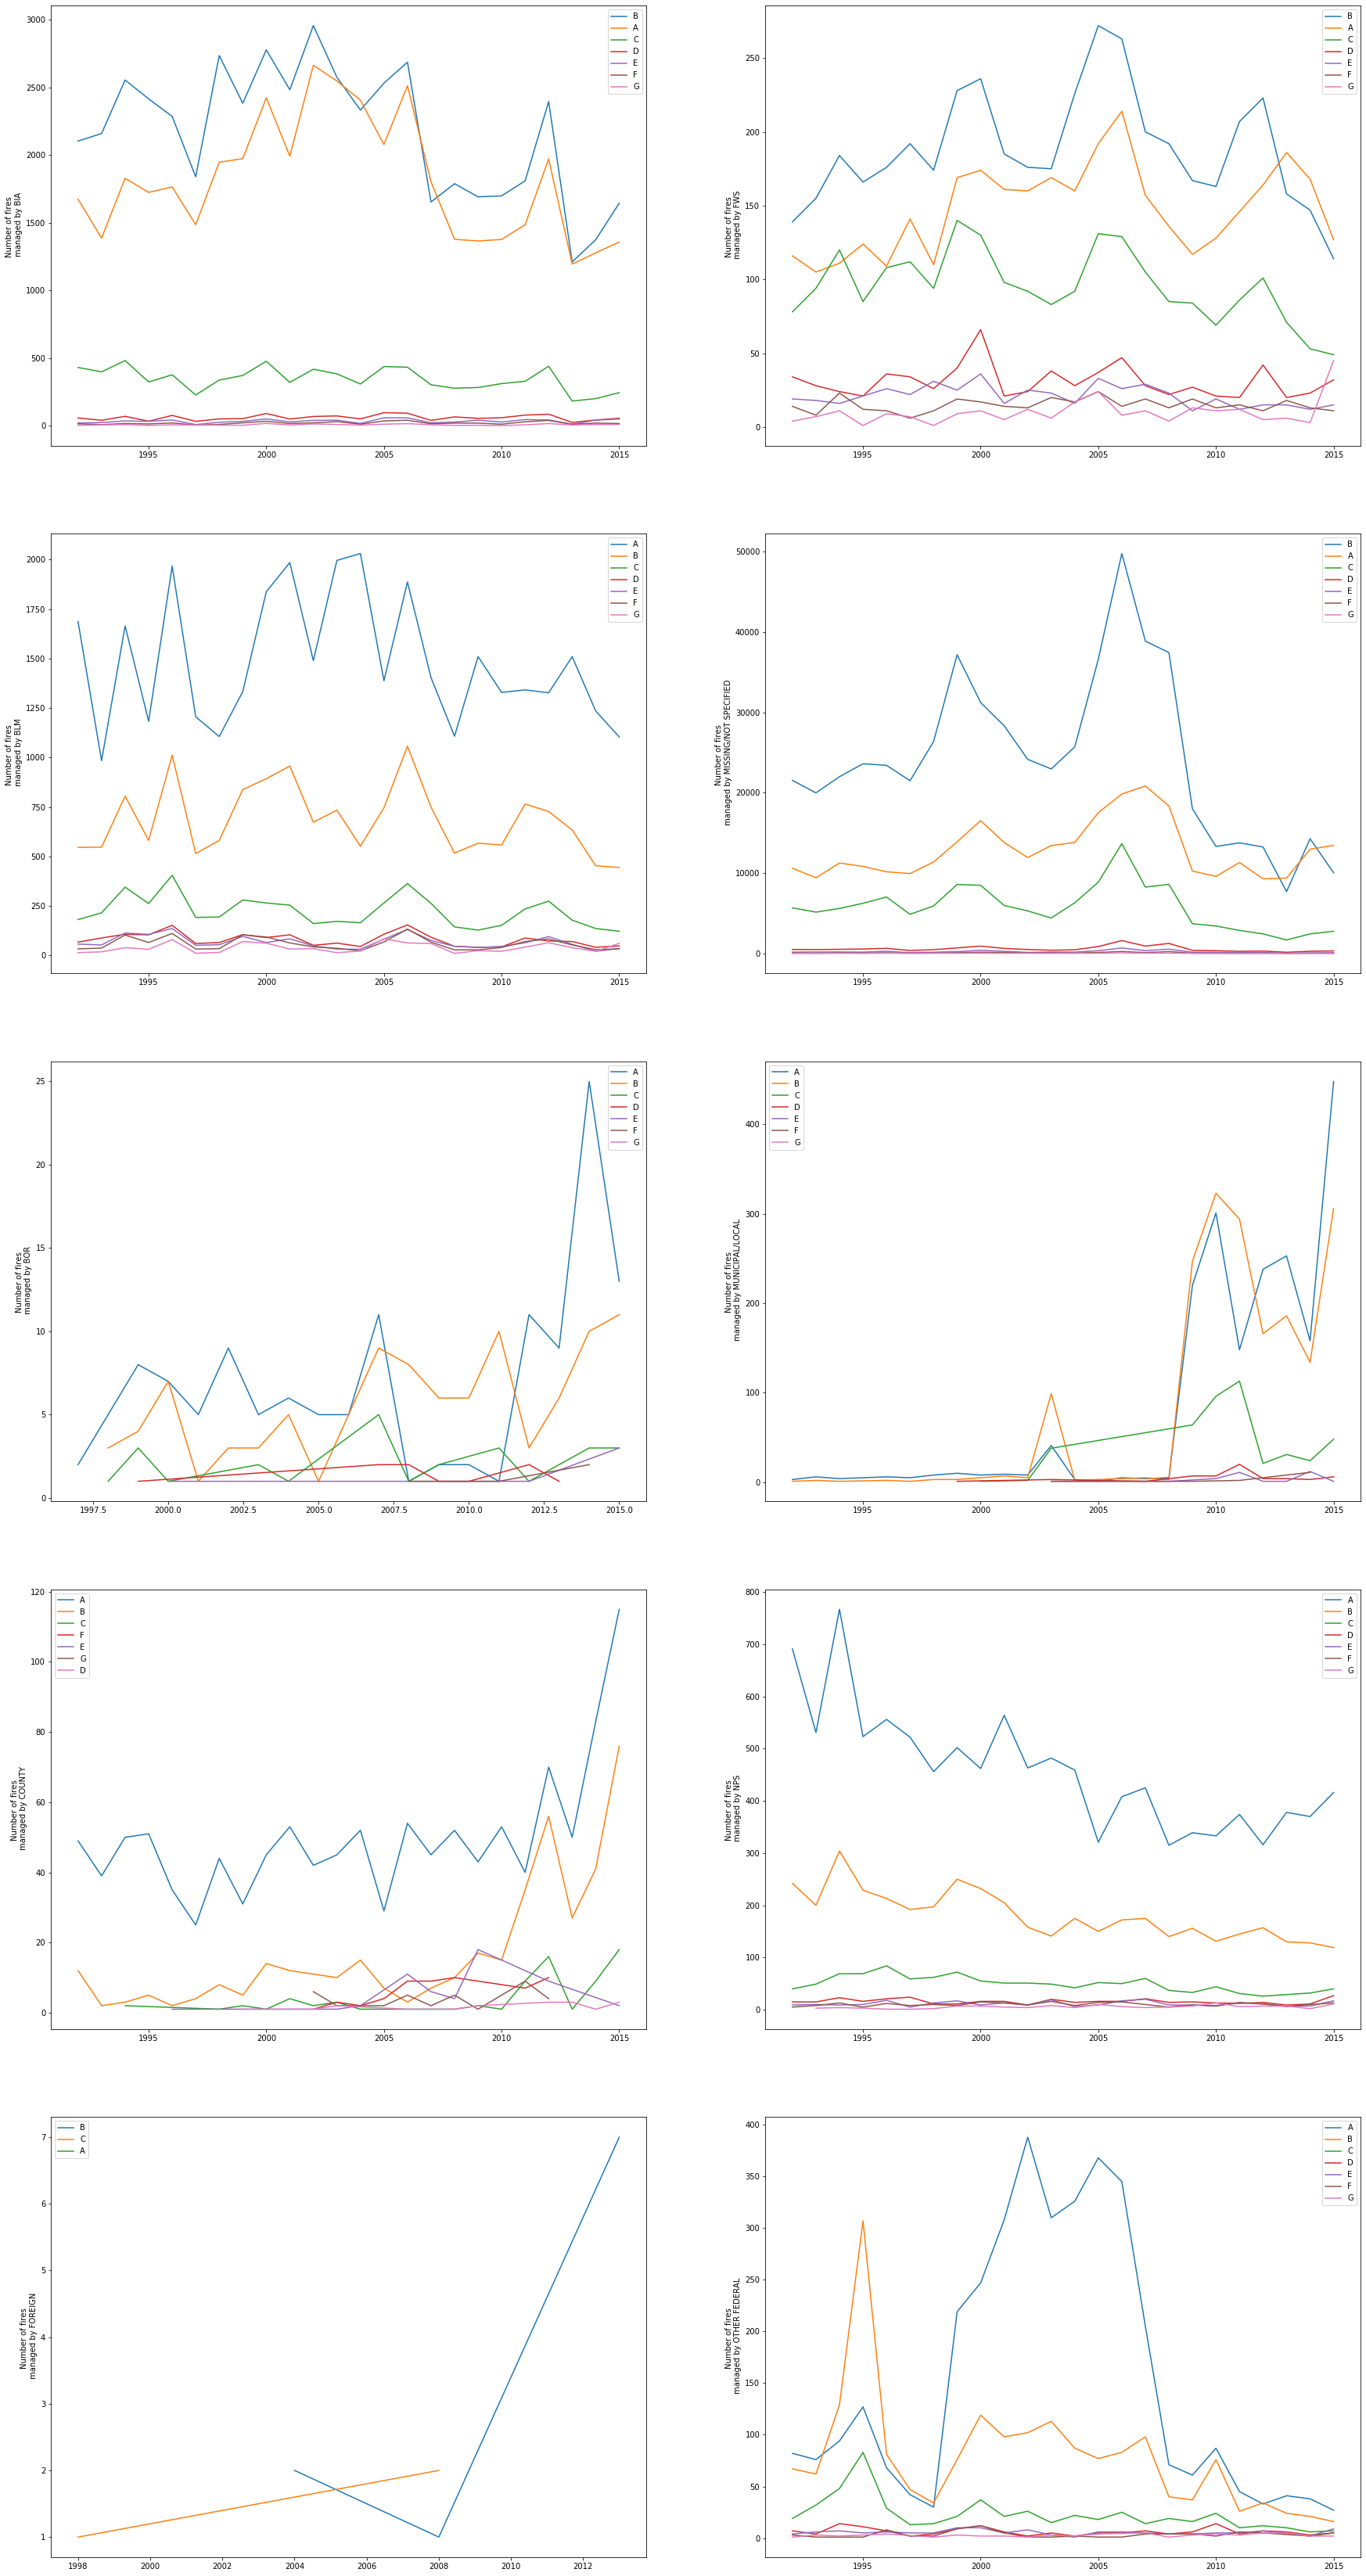

In [159]:
#Number of fires managed by the 5 owners/organizations of the 7 fire size classes
z = (dataframe.groupby(['OWNER_DESCR','FIRE_SIZE_CLASS']))['OBJECTID'].count()

firesize_class_list = z.index.levels[0]
x = []
for i in range(len(firesize_class_list)):
    x.append(z[z.index.levels[0][i]].sort_values(ascending = False).index[:7])


y = (dataframe.groupby(['OWNER_DESCR','FIRE_SIZE_CLASS','FIRE_YEAR']))['OBJECTID'].count()

firesize_class_list = y.index.levels[0]

fig, ax = plt.subplots(5,2,figsize = (30,60))

for i in range(len(firesize_class_list)):
    j = i//5
    k = i - (j*5)
    
    fire_size_class_description_list = []
    
    for l in x[i]:
        
        ax[k,j].plot(y[y.index.levels[0][i]][l].index, 
                     y[y.index.levels[0][i]][l].values,
                    label = l)
        ax[k,j].set(ylabel = 'Number of fires \n managed by {}'.format(firesize_class_list[i]))
    ax[k,j].legend()

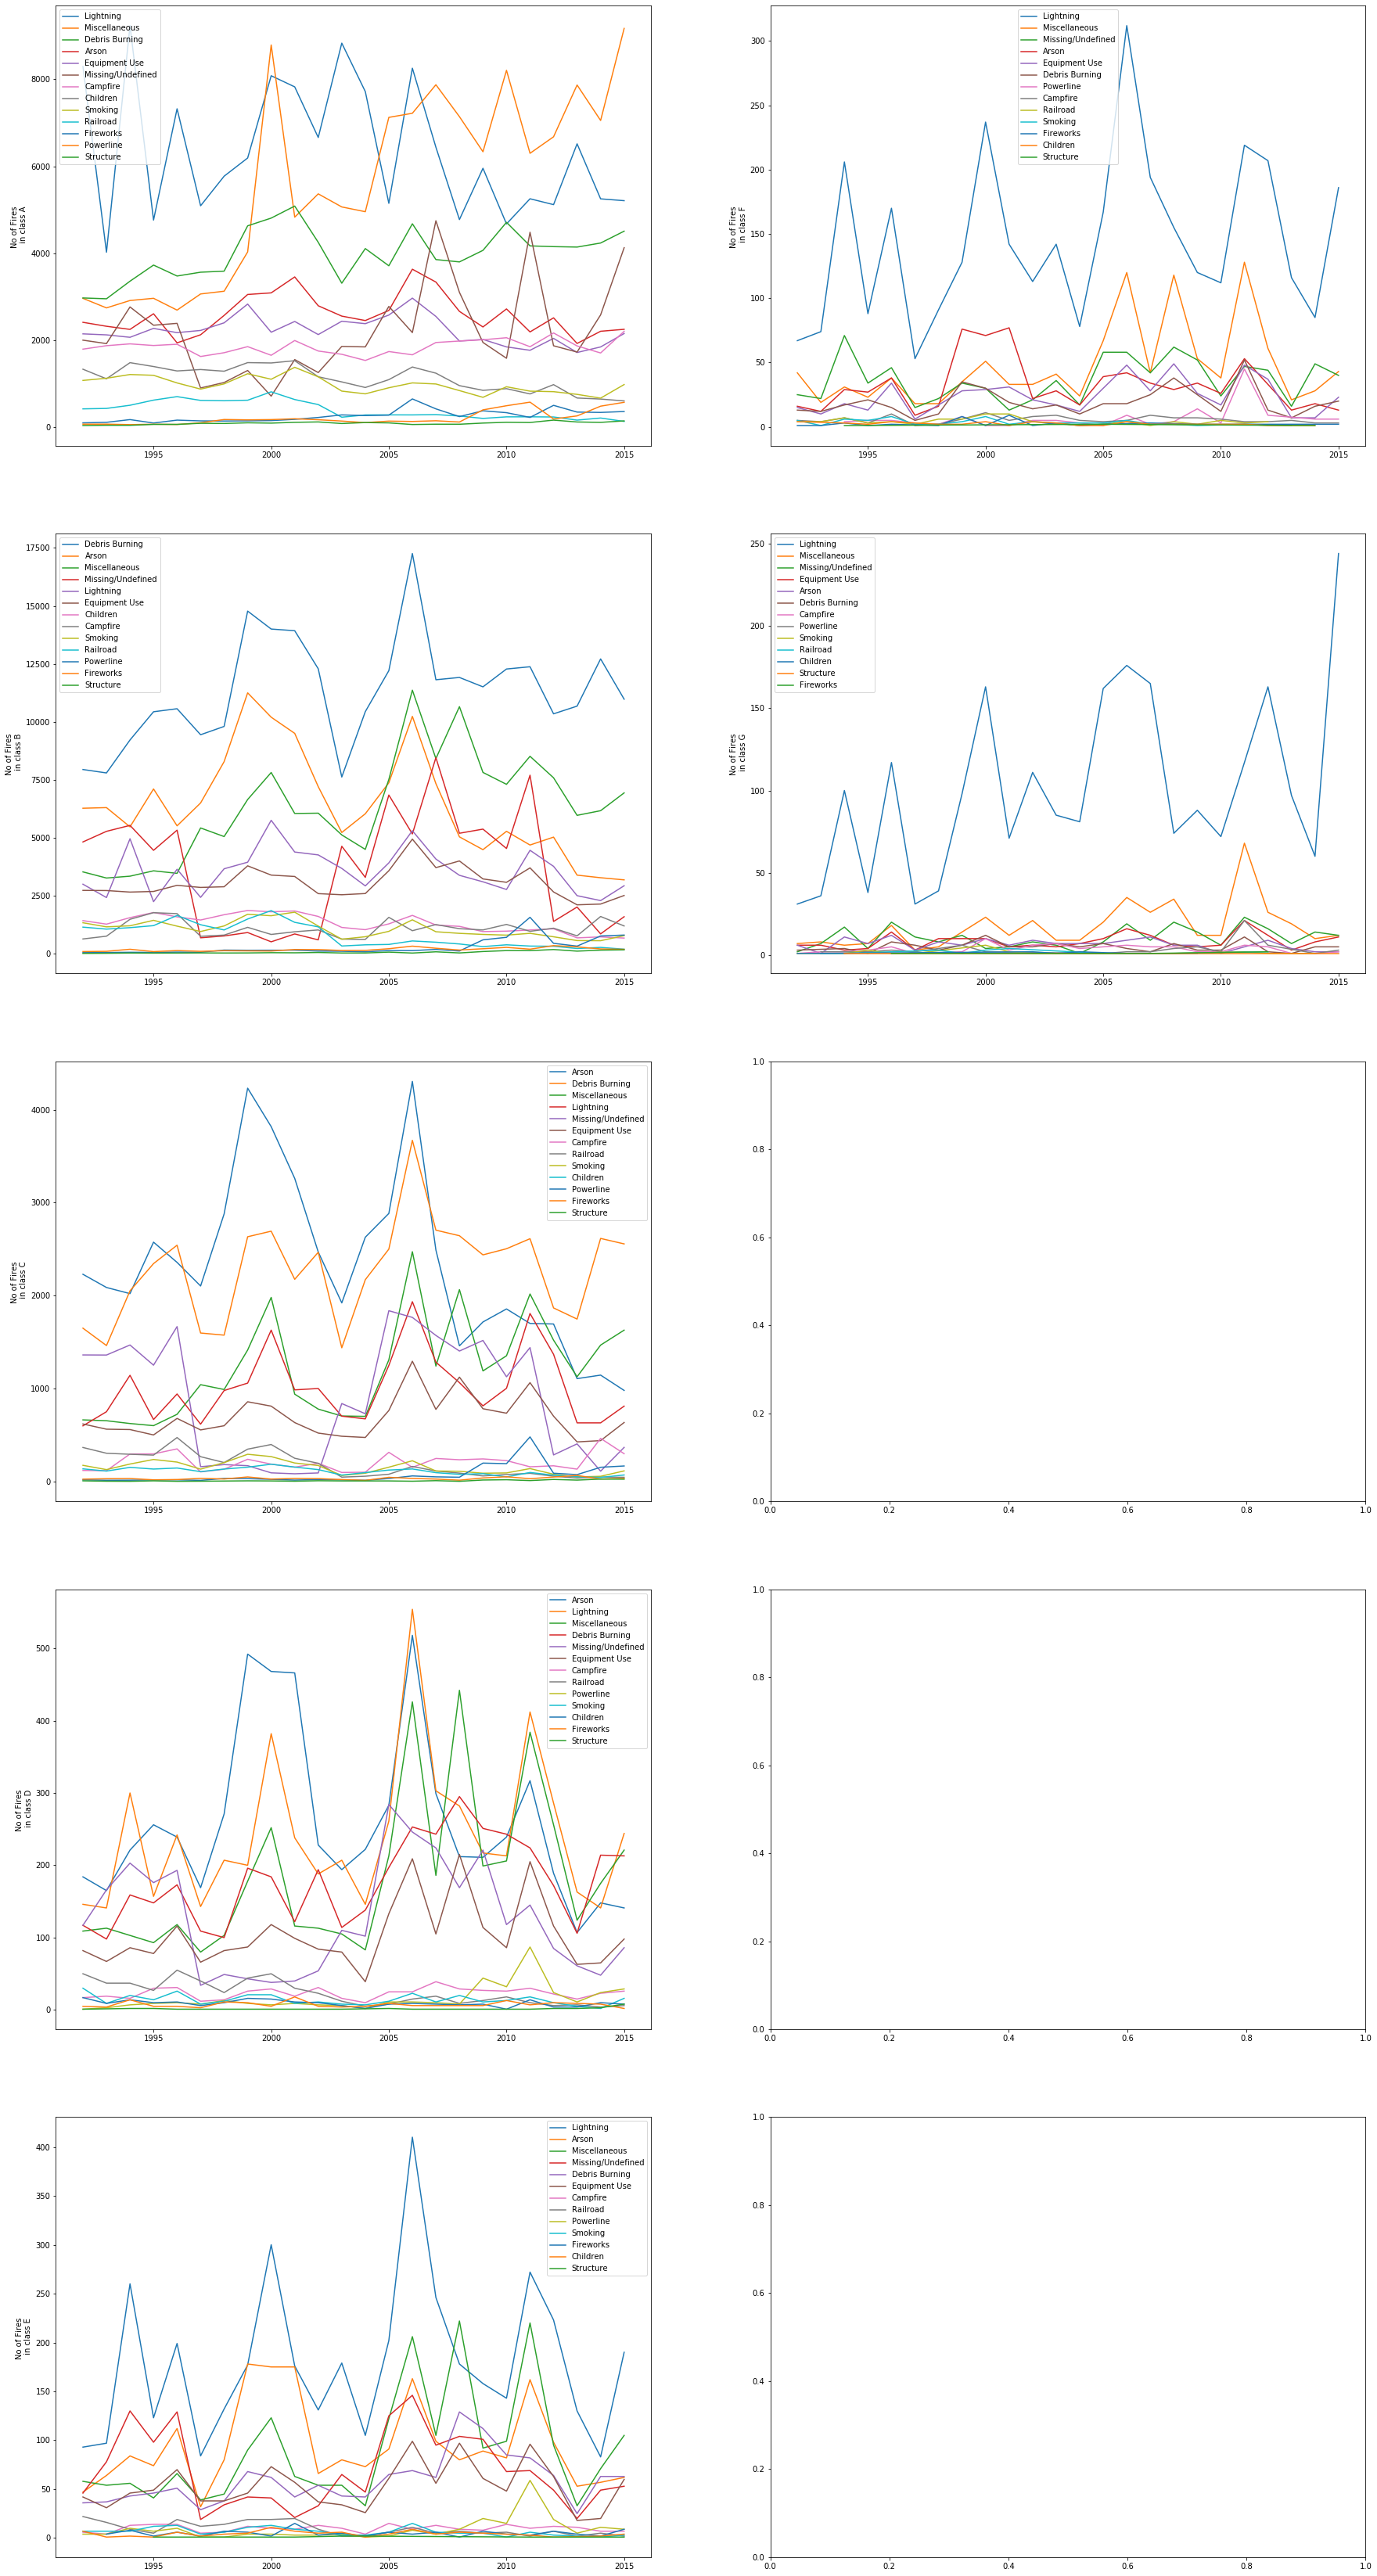

In [166]:
#Number of Fires in different fire size classes for all the causes over the years
#STAT_CAUSE_DESCR
z = (dataframe.groupby(['FIRE_SIZE_CLASS','STAT_CAUSE_DESCR']))['OBJECTID'].count()

cause_list = z.index.levels[0]
x = []
for i in range(len(owner_list)):
    x.append(z[z.index.levels[0][i]].sort_values(ascending = False).index[:13])


y = (dataframe.groupby(['FIRE_SIZE_CLASS','STAT_CAUSE_DESCR','FIRE_YEAR']))['OBJECTID'].count()

cause_list = y.index.levels[0]

fig, ax = plt.subplots(5,2,figsize = (30,60))

for i in range(len(cause_list)):
    j = i//5
    k = i - (j*5)
    
    fire_cause_description_list = []
    
    for l in x[i]:
        
        ax[k,j].plot(y[y.index.levels[0][i]][l].index, 
                     y[y.index.levels[0][i]][l].values,
                    label = l)
        ax[k,j].set(ylabel = 'No of Fires \n in class {}'.format(cause_list[i]))
    ax[k,j].legend()


In [ ]:
#Increasing trend for miscellaneous reason in class A fire
#Increasing trend for class F fire due to lightning over the years
#Increasing trend for class G fire due to lightning over the years

IndexError: list index out of range

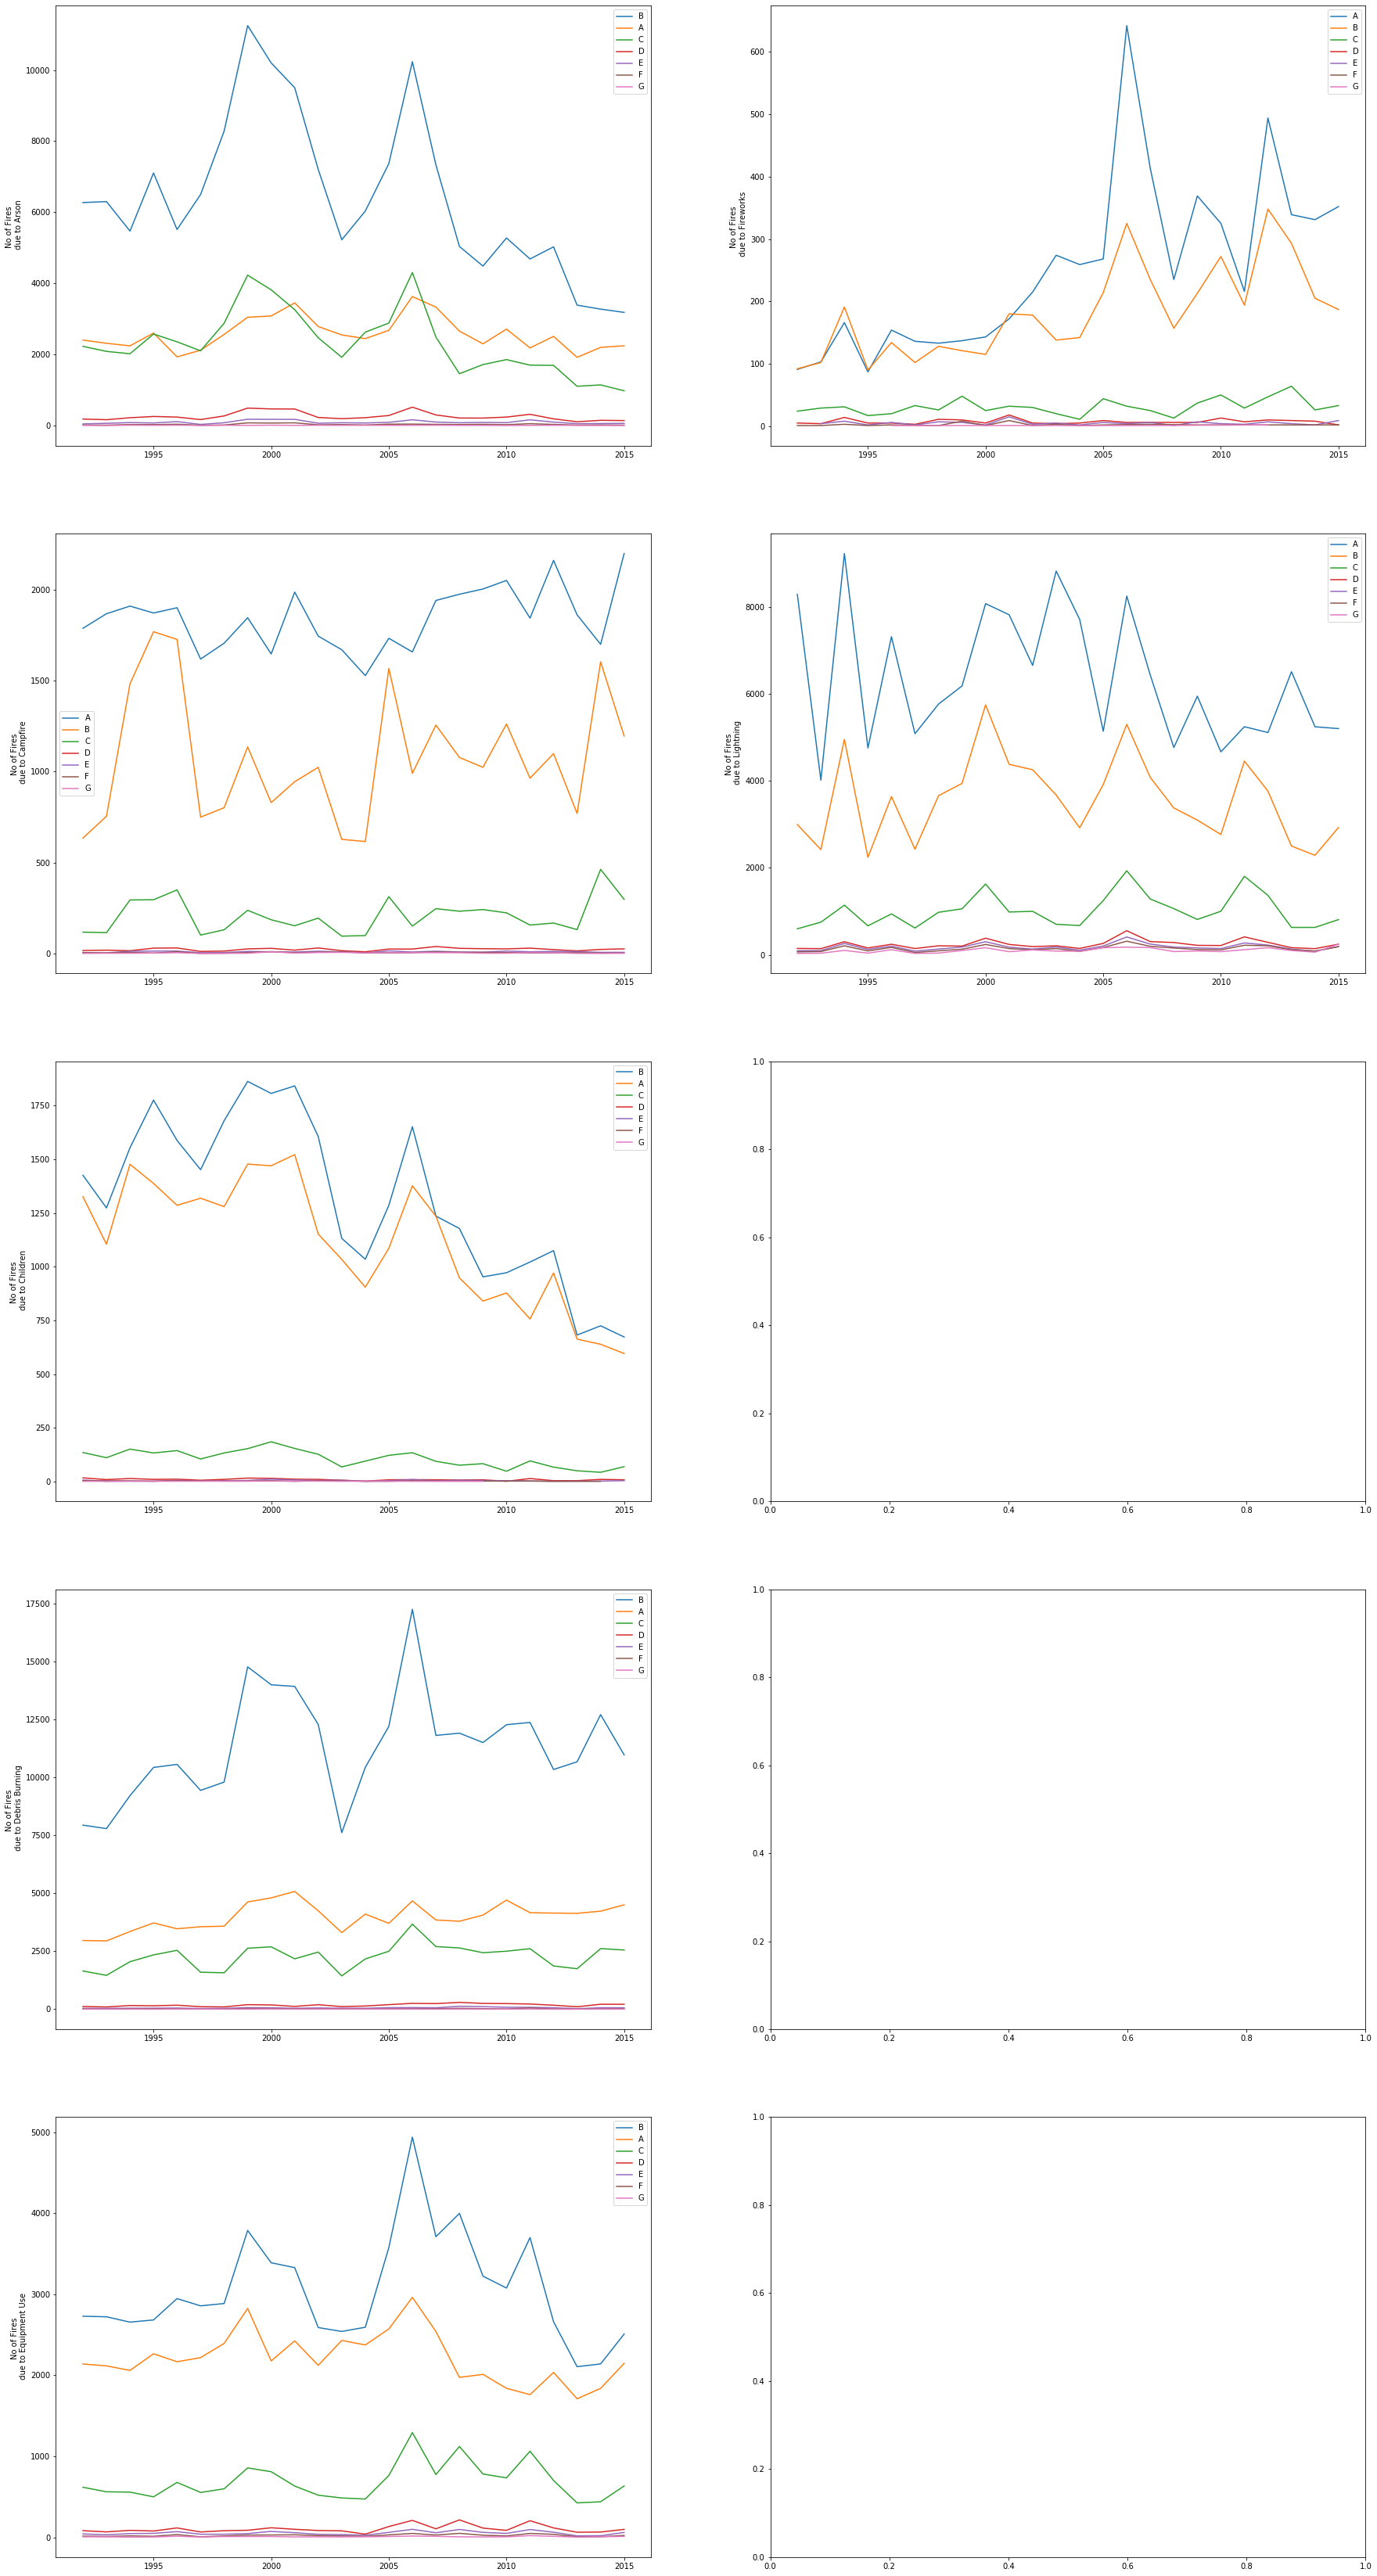

In [167]:
#Number of Fires for different causes for all the fire size classes over the years
#STAT_CAUSE_DESCR
z = (dataframe.groupby(['STAT_CAUSE_DESCR','FIRE_SIZE_CLASS']))['OBJECTID'].count()

fire_sizelist = z.index.levels[0]
x = []
for i in range(len(owner_list)):
    x.append(z[z.index.levels[0][i]].sort_values(ascending = False).index[:13])


y = (dataframe.groupby(['STAT_CAUSE_DESCR','FIRE_SIZE_CLASS','FIRE_YEAR']))['OBJECTID'].count()

fire_sizelist = y.index.levels[0]

fig, ax = plt.subplots(5,2,figsize = (30,60))

for i in range(len(fire_sizelist)):
    j = i//5
    k = i - (j*5)
    
    fire_size_description_list = []
    
    for l in x[i]:
        
        ax[k,j].plot(y[y.index.levels[0][i]][l].index, 
                     y[y.index.levels[0][i]][l].values,
                    label = l)
        ax[k,j].set(ylabel = 'No of Fires \n due to {}'.format(fire_sizelist[i]))
    ax[k,j].legend()


In [ ]:
#STATE WISE ANALYSIS

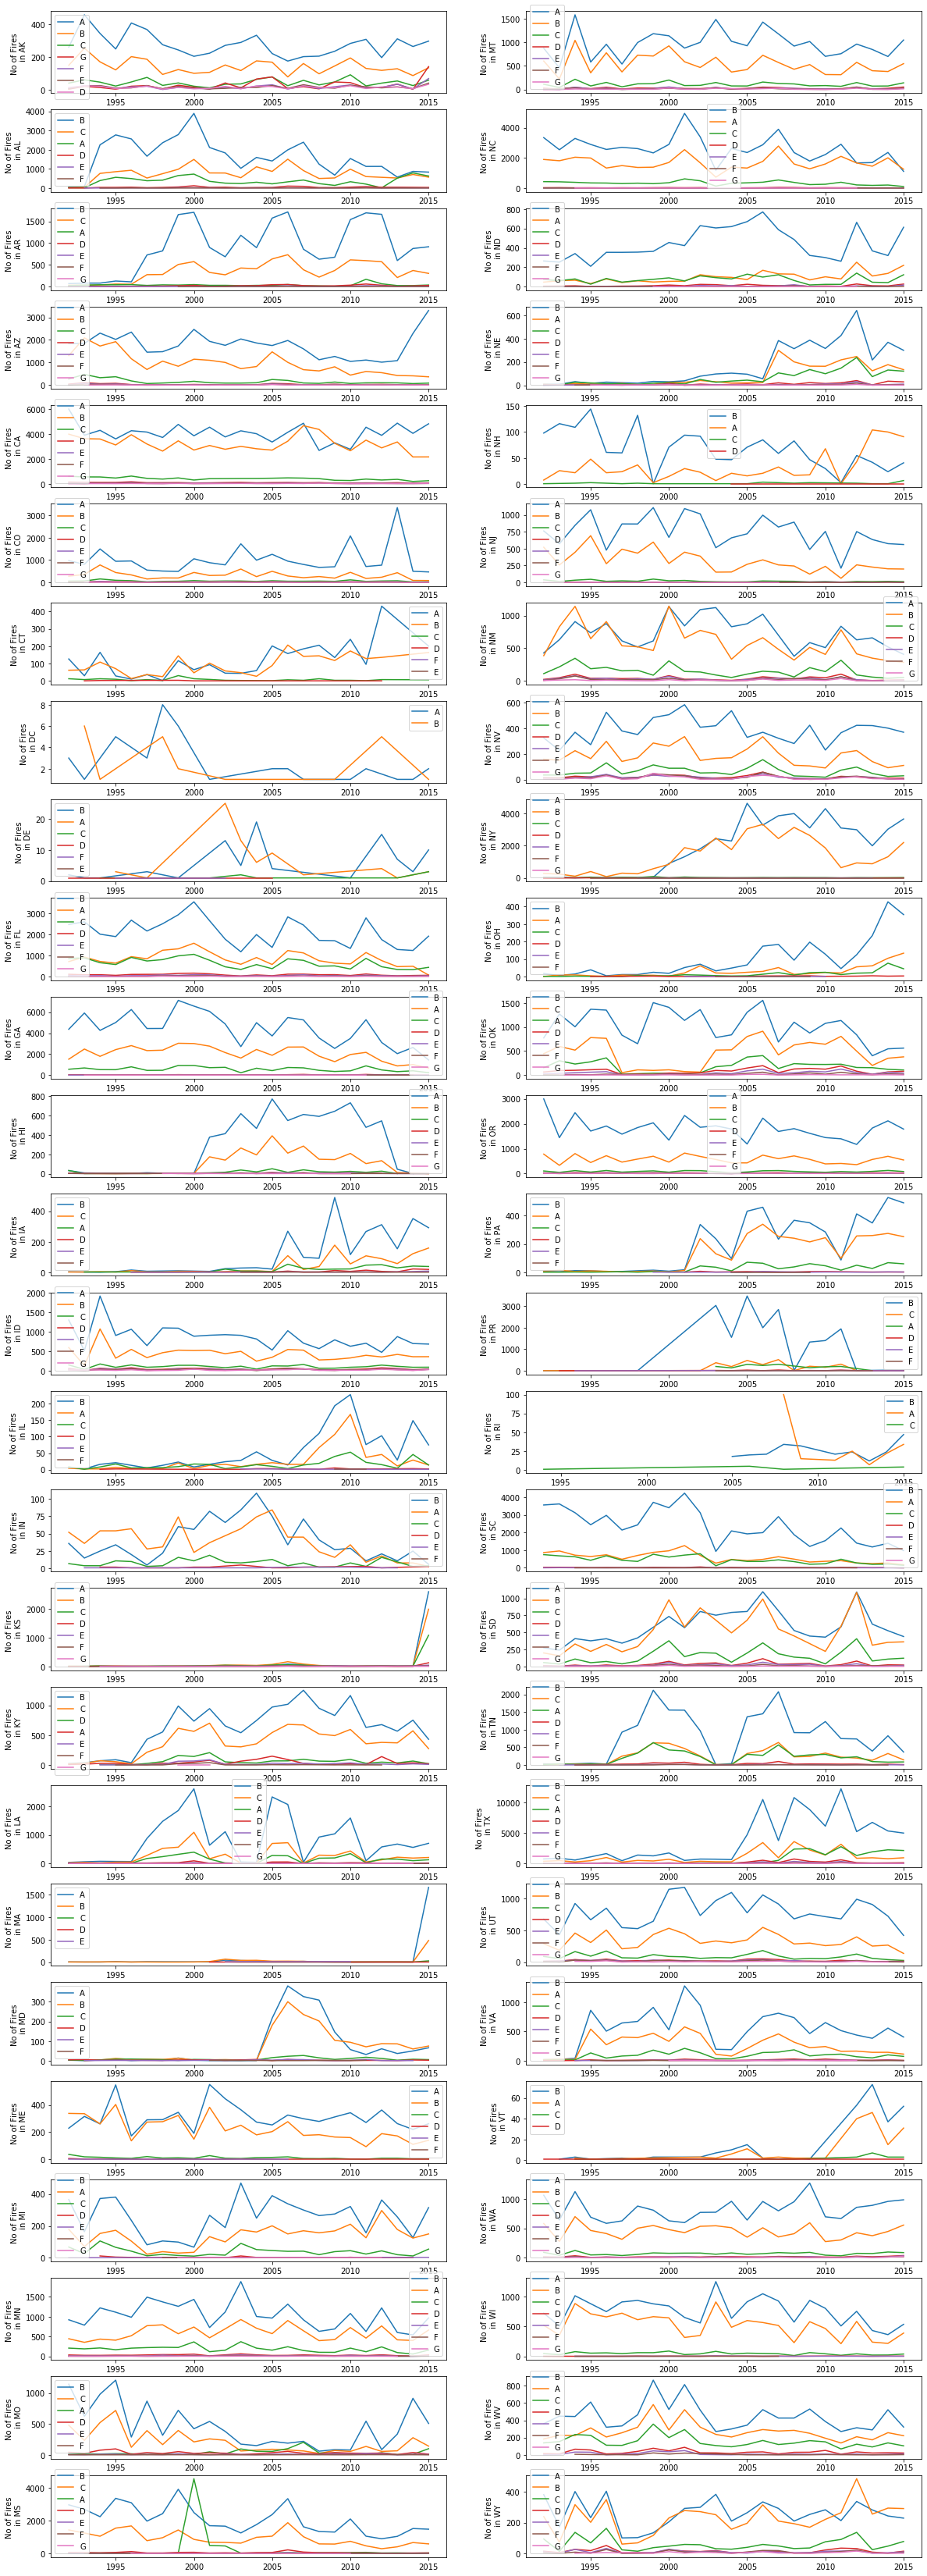

In [157]:
#Trend over time for number of fires in every state for the 7 fire size classes
z = (dataframe.groupby(['STATE','FIRE_SIZE_CLASS']))['OBJECTID'].count()

states_list = z.index.levels[0]
x = []
for i in range(len(states_list)):
    x.append(z[z.index.levels[0][i]].sort_values(ascending = False).index[:7])


y = (dataframe.groupby(['STATE','FIRE_SIZE_CLASS','FIRE_YEAR']))['OBJECTID'].count()

state_list = y.index.levels[0]

fig, ax = plt.subplots(26,2,figsize = (20,60))

for i in range(len(states_list)):
    j = i//26
    k = i - (j*26)
    
    stat_cause_list = []
    
    for l in x[i]:
        
        ax[k,j].plot(y[y.index.levels[0][i]][l].index, 
                     y[y.index.levels[0][i]][l].values,
                    label = l)
        ax[k,j].set(ylabel = 'No of Fires \n in {}'.format(states_list[i]))
    ax[k,j].legend()

In [ ]:
#The state of Pennsylvania can be seen to have increasing number of class B fires over the recent 5 years

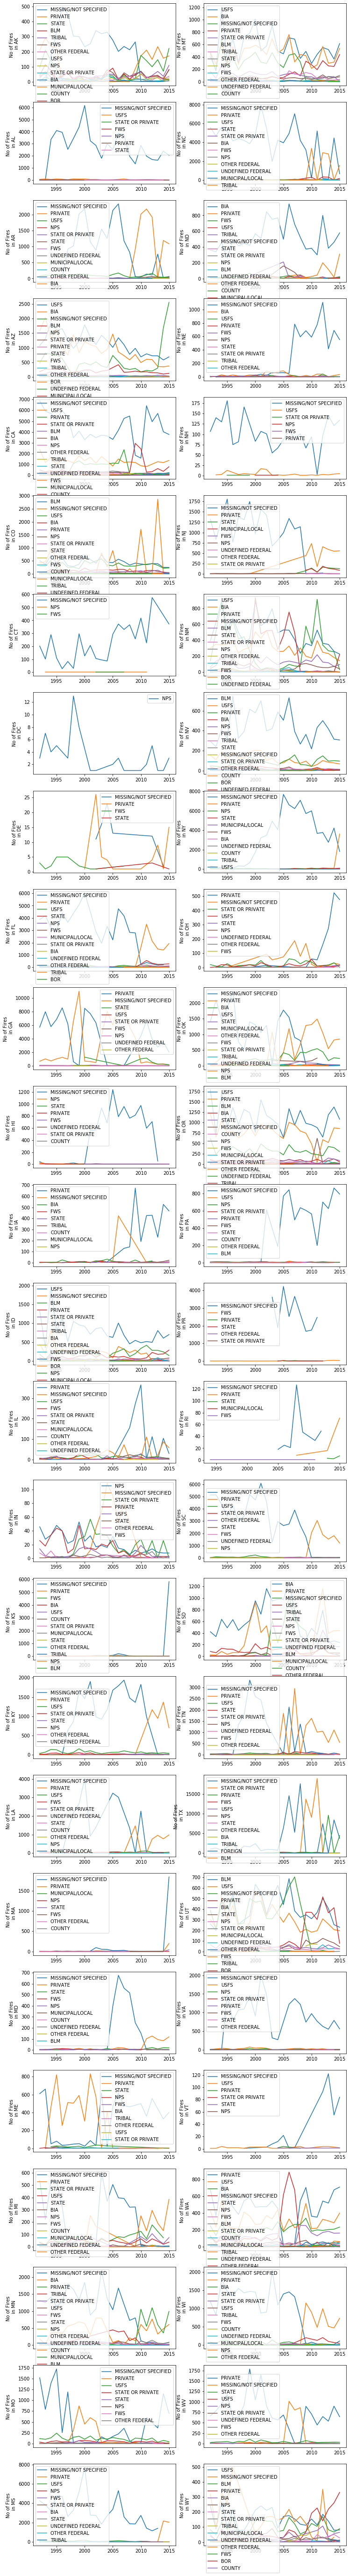

In [180]:
#Trend over time for number of fires in every state managed by the 5 owners/organizations
z = (dataframe.groupby(['STATE','OWNER_DESCR']))['OBJECTID'].count()

state_list = z.index.levels[0]
x = []
for i in range(len(state_list)):
    x.append(z[z.index.levels[0][i]].sort_values(ascending = False).index[:16])


y = (dataframe.groupby(['STATE','OWNER_DESCR','FIRE_YEAR']))['OBJECTID'].count()

state_list = y.index.levels[0]

fig, ax = plt.subplots(26,2,figsize = (12,100))

for i in range(len(states_list)):
    j = i//26
    k = i - (j*26)
    
    stat_cause_list = []
    
    for l in x[i]:
        
        ax[k,j].plot(y[y.index.levels[0][i]][l].index, 
                     y[y.index.levels[0][i]][l].values,
                    label = l)
        ax[k,j].set(ylabel = 'No of Fires \n in {}'.format(states_list[i]))
    ax[k,j].legend()

In [184]:
#An increasing trend for the number of fires managed by private and USFS organizations can be observed in Washington State over the years
#Similarly in Pennsylvania and Iowa the fires managed by private organizations seems to be increasing over the years

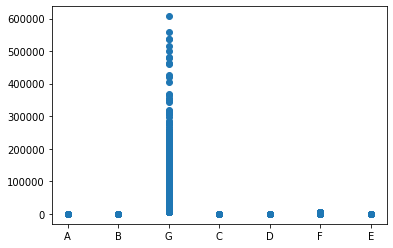

In [81]:
plt.scatter(dataframe.FIRE_SIZE_CLASS,dataframe.FIRE_SIZE)